# Backtesting using SMA-Based Strategy

This section uses vectorized backtesting on simple moving averages to start off. *Or as I like to call it Technical Analysis step 1.*

In [1]:
import os
import math
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED']='0'

In [2]:
url='../input/eod-data-aiif/aiif_eikon_eod_data.csv'

In [3]:
symbol='EUR='
data=pd.DataFrame(pd.read_csv(url, index_col=0,parse_dates=True).dropna()[symbol])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EUR=    2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


<AxesSubplot:xlabel='Date'>

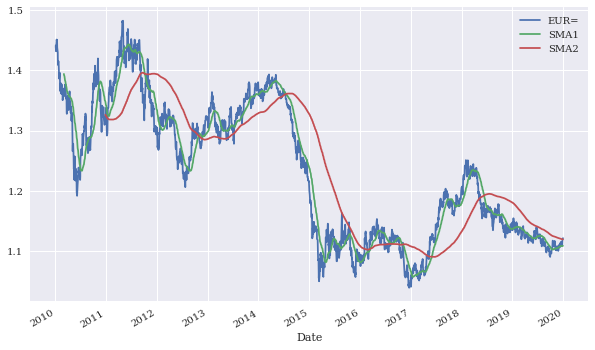

In [4]:
data['SMA1'] = data[symbol].rolling(42).mean()
data['SMA2'] = data[symbol].rolling(248).mean()
data.plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

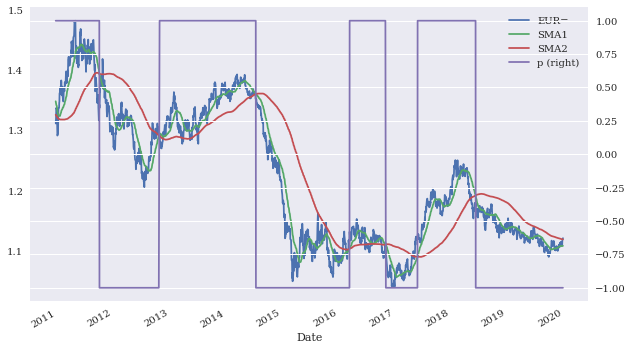

In [5]:
# deletes vacations and holidays
data.dropna(inplace=True)

# derives the position values based on same-day SMA values
# SMA 1 being more than SMA 2 is a long position, SMA less 
data['p']=np.where(data['SMA1'] > data['SMA2'],1,-1)

# shifts to the position values by one day to avoid the foresight bias
data.dropna(inplace=True)

data.plot(figsize=(10, 6), secondary_y='p')